In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Import citipy 
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'},
  {'id': 711, 'main': 'Smoke', 'description': 'smoke', 'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 85.48,
  'feels_like': 90.12,
  'temp_min': 80.94,
  'temp_max': 89.62,
  'pressure': 1010,
  'humidity': 60},
 'visibility': 8047,
 'wind': {'speed': 5.01, 'deg': 344, 'gust': 15.99},
 'clouds': {'all': 75},
 'dt': 1626809709,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1626773111,
  'sunset': 1626826540},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [8]:
# Get the JSON data.
boston_data = city_weather.json()

In [9]:
boston_data['sys']['country']

'US'

In [10]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 89.62 60 75 5.01


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-07-20 19:35:09'

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | villa corzo
Processing Record 2 of Set 1 | kita
Processing Record 3 of Set 1 | whitehorse
Processing Record 4 of Set 1 | chicama
Processing Record 5 of Set 1 | saryshagan
City not found. Skipping...
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | bagdarin
Processing Record 8 of Set 1 | clyde river
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | maple creek
Processing Record 12 of Set 1 | nizwa
Processing Record 13 of Set 1 | te anau
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | arys
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | airai
Processing Record 20 of Set 1 | mildmay
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | pisco
Processing Record 23 of Set 1 |

Processing Record 36 of Set 4 | yenagoa
Processing Record 37 of Set 4 | norman wells
Processing Record 38 of Set 4 | aksum
Processing Record 39 of Set 4 | makakilo city
Processing Record 40 of Set 4 | itarema
Processing Record 41 of Set 4 | ciudad bolivar
Processing Record 42 of Set 4 | arroyo
Processing Record 43 of Set 4 | sao joao da barra
Processing Record 44 of Set 4 | zhuzhou
Processing Record 45 of Set 4 | geraldton
Processing Record 46 of Set 4 | jacareacanga
Processing Record 47 of Set 4 | tual
Processing Record 48 of Set 4 | torbay
Processing Record 49 of Set 4 | rungata
City not found. Skipping...
Processing Record 50 of Set 4 | nemuro
Processing Record 1 of Set 5 | port-cartier
Processing Record 2 of Set 5 | fortuna
Processing Record 3 of Set 5 | la ronge
Processing Record 4 of Set 5 | kaitangata
Processing Record 5 of Set 5 | maniitsoq
Processing Record 6 of Set 5 | elko
Processing Record 7 of Set 5 | sorland
Processing Record 8 of Set 5 | roswell
Processing Record 9 of Se

Processing Record 28 of Set 8 | anandnagar
Processing Record 29 of Set 8 | okandja
City not found. Skipping...
Processing Record 30 of Set 8 | rabo de peixe
Processing Record 31 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 32 of Set 8 | touros
Processing Record 33 of Set 8 | vryburg
Processing Record 34 of Set 8 | bidar
Processing Record 35 of Set 8 | sabang
Processing Record 36 of Set 8 | san andres
Processing Record 37 of Set 8 | ifo
Processing Record 38 of Set 8 | manokwari
Processing Record 39 of Set 8 | shiyan
Processing Record 40 of Set 8 | khandyga
Processing Record 41 of Set 8 | barra dos coqueiros
Processing Record 42 of Set 8 | maykain
City not found. Skipping...
Processing Record 43 of Set 8 | xining
Processing Record 44 of Set 8 | uva
Processing Record 45 of Set 8 | vila velha
Processing Record 46 of Set 8 | abha
Processing Record 47 of Set 8 | karasjok
Processing Record 48 of Set 8 | lokosovo
Processing Record 49 of Set 8 | ternate
Processing Record

Processing Record 15 of Set 12 | oppdal
Processing Record 16 of Set 12 | antalaha
Processing Record 17 of Set 12 | toora-khem
Processing Record 18 of Set 12 | cody
Processing Record 19 of Set 12 | kirkland lake
Processing Record 20 of Set 12 | norsup
Processing Record 21 of Set 12 | reconquista
Processing Record 22 of Set 12 | bonavista
Processing Record 23 of Set 12 | marsaxlokk
Processing Record 24 of Set 12 | aykhal
Processing Record 25 of Set 12 | coquimbo
Processing Record 26 of Set 12 | namibe
Processing Record 27 of Set 12 | adrar
Processing Record 28 of Set 12 | kuche
City not found. Skipping...
Processing Record 29 of Set 12 | guerrero negro
Processing Record 30 of Set 12 | barinas
Processing Record 31 of Set 12 | santa rosa
Processing Record 32 of Set 12 | mayo
Processing Record 33 of Set 12 | herat
Processing Record 34 of Set 12 | betafo
Processing Record 35 of Set 12 | mildura
Processing Record 36 of Set 12 | kavaratti
Processing Record 37 of Set 12 | siirt
Processing Recor

In [13]:
print(len(city_data))

571


In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Villa Corzo,16.1667,-93.2500,84.99,53,62,3.29,MX,2021-07-20 19:38:54
1,Kita,13.0349,-9.4895,84.85,63,30,4.47,ML,2021-07-20 19:38:55
2,Whitehorse,60.7161,-135.0538,63.37,63,75,6.91,CA,2021-07-20 19:38:55
3,Chicama,-7.8447,-79.1469,66.74,63,4,10.45,PE,2021-07-20 19:38:56
4,Victoria,22.2855,114.1577,82.38,94,100,1.01,HK,2021-07-20 19:38:28
5,Bagdarin,54.4333,113.6000,53.24,89,50,2.68,RU,2021-07-20 19:38:56
6,Clyde River,70.4692,-68.5914,41.23,93,75,10.36,CA,2021-07-20 19:38:57
7,Busselton,-33.6500,115.3333,53.10,93,100,12.59,AU,2021-07-20 19:38:57
8,Ushuaia,-54.8000,-68.3000,35.26,69,75,11.50,AR,2021-07-20 19:38:44
9,Maple Creek,49.9168,-109.4848,84.69,42,77,10.36,CA,2021-07-20 19:38:58


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Villa Corzo,MX,2021-07-20 19:38:54,16.1667,-93.2500,84.99,53,62,3.29
1,Kita,ML,2021-07-20 19:38:55,13.0349,-9.4895,84.85,63,30,4.47
2,Whitehorse,CA,2021-07-20 19:38:55,60.7161,-135.0538,63.37,63,75,6.91
3,Chicama,PE,2021-07-20 19:38:56,-7.8447,-79.1469,66.74,63,4,10.45
4,Victoria,HK,2021-07-20 19:38:28,22.2855,114.1577,82.38,94,100,1.01
5,Bagdarin,RU,2021-07-20 19:38:56,54.4333,113.6000,53.24,89,50,2.68
6,Clyde River,CA,2021-07-20 19:38:57,70.4692,-68.5914,41.23,93,75,10.36
7,Busselton,AU,2021-07-20 19:38:57,-33.6500,115.3333,53.10,93,100,12.59
8,Ushuaia,AR,2021-07-20 19:38:44,-54.8000,-68.3000,35.26,69,75,11.50
9,Maple Creek,CA,2021-07-20 19:38:58,49.9168,-109.4848,84.69,42,77,10.36


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

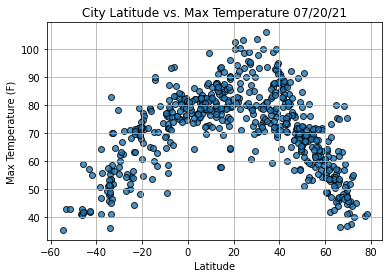

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

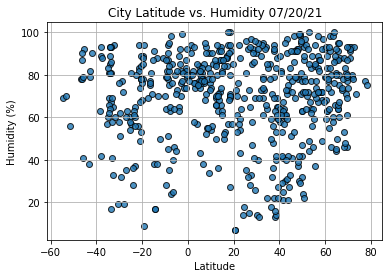

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

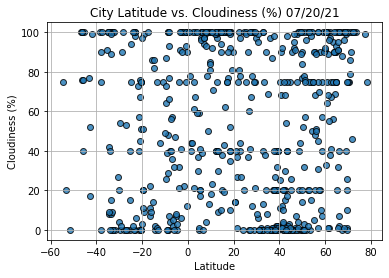

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


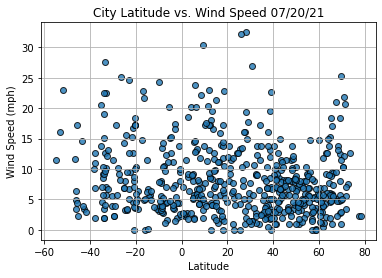

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

SyntaxError: unexpected EOF while parsing (<ipython-input-22-d58af2435033>, line 3)

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                         Arys
Country                        KZ
Date          2021-07-20 19:38:59
Lat                       42.4252
Lng                        68.795
Max Temp                    80.82
Humidity                       30
Cloudiness                     30
Wind Speed                    4.7
Name: 13, dtype: object

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Villa Corzo,MX,2021-07-20 19:38:54,16.1667,-93.2500,84.99,53,62,3.29
1,Kita,ML,2021-07-20 19:38:55,13.0349,-9.4895,84.85,63,30,4.47
2,Whitehorse,CA,2021-07-20 19:38:55,60.7161,-135.0538,63.37,63,75,6.91
4,Victoria,HK,2021-07-20 19:38:28,22.2855,114.1577,82.38,94,100,1.01
5,Bagdarin,RU,2021-07-20 19:38:56,54.4333,113.6000,53.24,89,50,2.68


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

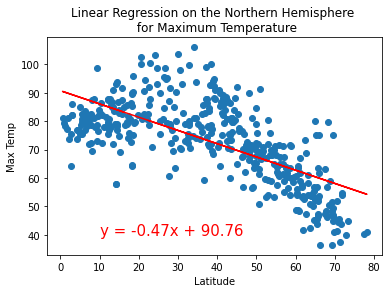

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))



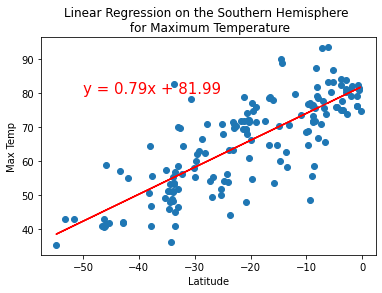

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \n for Maximum Temperature", 'Max Temp', (-50,80))



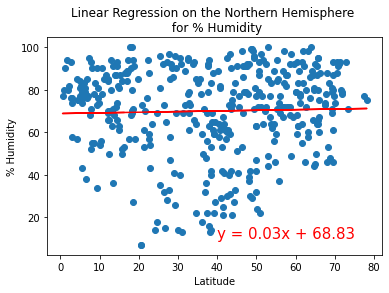

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))



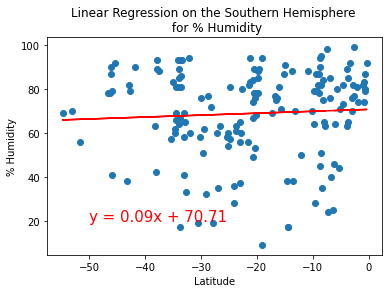

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,20))



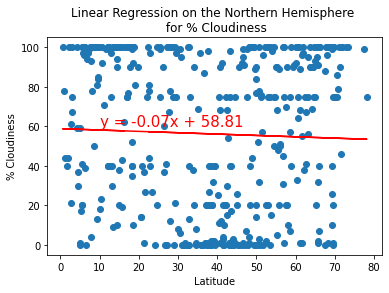

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,60))



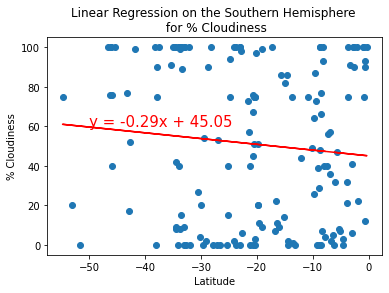

In [35]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))



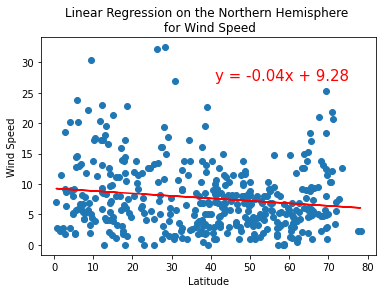

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(41,27))


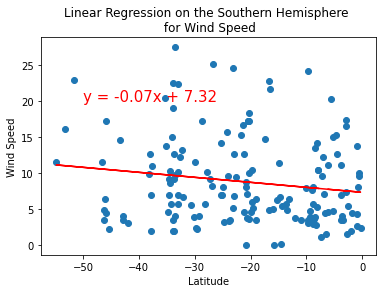

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))
